<a href="https://colab.research.google.com/github/faisalalshahrani101/faisal/blob/main/Copy_of_project_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df.shape

(301, 9)

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


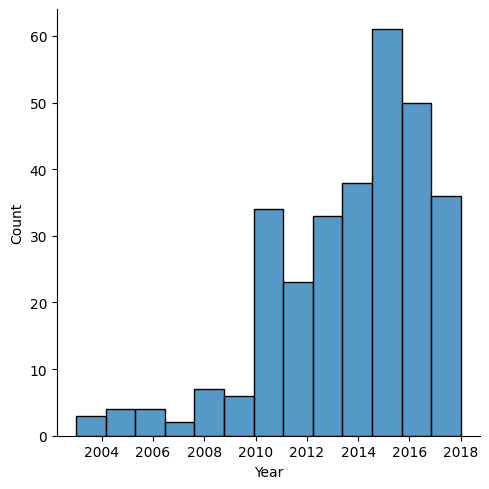

In [7]:
sns.displot(df['Year'])

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


corallition


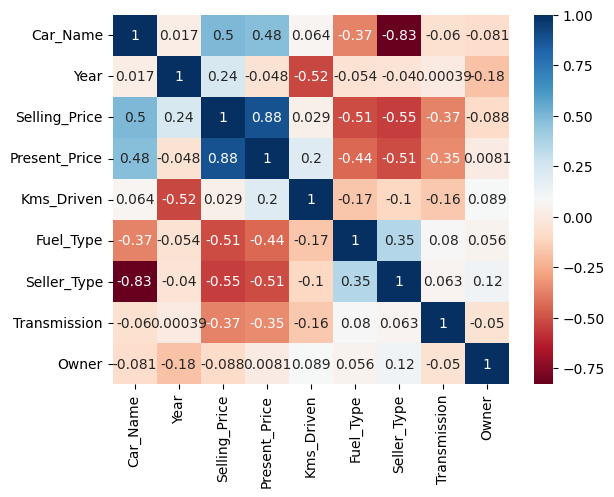

In [10]:
df['Car_Name'] = pd.Categorical(df['Car_Name']).codes
df['Fuel_Type'] = pd.Categorical(df['Fuel_Type']).codes
df['Seller_Type'] = pd.Categorical(df['Seller_Type']).codes
df['Transmission'] = pd.Categorical(df['Transmission']).codes
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

In [11]:
X= df.drop('Present_Price', axis=1)
y= df['Present_Price']
print(X.shape)
print(y.shape)

(301, 8)
(301,)


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
scaler = StandardScaler()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


liner regression

In [16]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [18]:

y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 2.093654001591822
Mean Squared Error: 10.772617881990834
Root Mean Squared Error: 3.2821666444577176
R2 Score: 0.7864129737324753


In [19]:
y_predict_slr = model.predict(X_test)
r_square = metrics.r2_score(y_test, y_predict_slr)
print('R-Square Error associated with Simple Linear Regression:',r_square)

R-Square Error associated with Simple Linear Regression: 0.7864129737324753


RandomForestRegressor

In [20]:
from sklearn.ensemble import RandomForestRegressor



In [21]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [22]:
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"R oot Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 1.3173321311475403
Mean Squared Error: 5.419091725091806
R oot Mean Squared Error: 2.3278942684520287
R2 Score: 0.8925565076834038


svr

In [23]:
from sklearn.svm import SVR

In [24]:
model = SVR(kernel="linear")
model.fit(X_train,y_train)

SVR(kernel='linear')

In [25]:
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 2.0160190351309852
Mean Squared Error: 12.942443096823366
Root Mean Squared Error: 3.5975607148209976
R2 Score: 0.7433921852636722


DecisionTree

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [28]:
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 1.6340819672131144
Mean Squared Error: 7.696126639344262
Root Mean Squared Error: 2.774189366165234
R2 Score: 0.8474100891089958


kmean

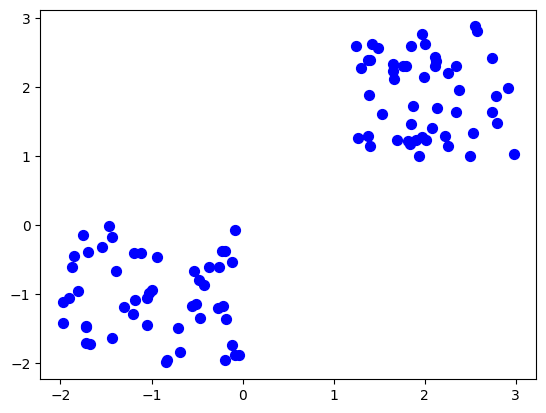

In [29]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c ='b')
plt.show()

In [30]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [31]:
Kmean.cluster_centers_

array([[ 1.99773797,  1.886723  ],
       [-0.96688307, -1.0369229 ]])

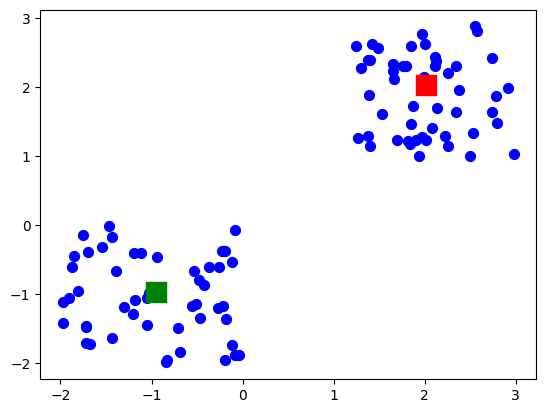

In [32]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker='s')
plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')
plt.show()

In [33]:
Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [34]:
sample_test=np.array([-3.0,-3.0])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)

array([1], dtype=int32)

polynomial regression

In [35]:
polynom = PolynomialFeatures(degree = 2)
X_polynom = polynom.fit_transform(X_train)


In [36]:
df2=df['Present_Price']
df1=df['Selling_Price']
print(df2.shape)
print(df1.shape)

(301,)
(301,)


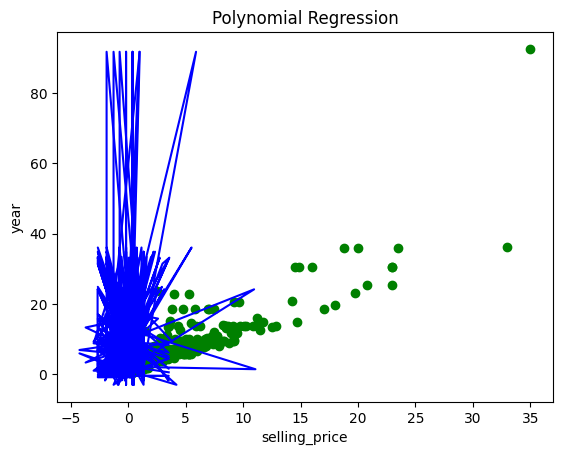

In [37]:
PolyReg = LinearRegression()
PolyReg.fit(X_polynom, y_train)
# Visualise the Polynomial Regression Results
plt.scatter(df1, df2, color = 'green')
plt.plot(X_train, PolyReg.predict(polynom.fit_transform(X_train)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('selling_price')
plt.ylabel('year')
plt.show()

In [38]:
y_predict_pr = PolyReg.predict(polynom.fit_transform(X_test))
r_square = metrics.r2_score(y_test, y_predict_pr)
print('R-Square Error associated with Polynomial Regression is:',r_square)

R-Square Error associated with Polynomial Regression is: 0.9111932667730588


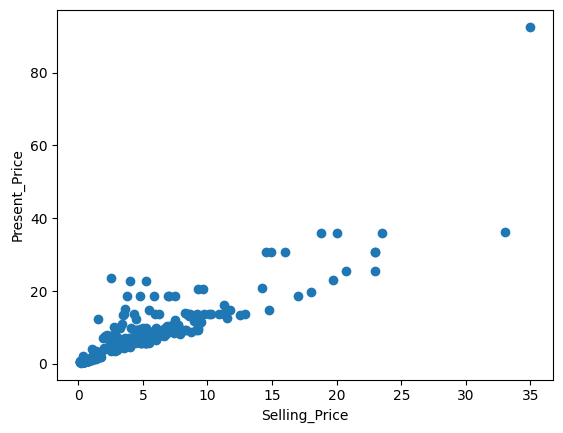

In [44]:
plt.scatter(df['Selling_Price'],df['Present_Price'])
plt.xlabel('Selling_Price')
plt.ylabel('Present_Price')
plt.show()

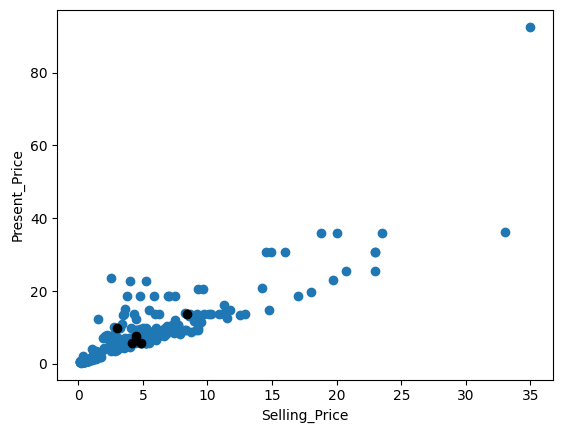

In [48]:
K=5
centroids = df.sample(n=K)
plt.scatter(df['Selling_Price'],df['Present_Price'])
plt.scatter(centroids['Selling_Price'],centroids['Present_Price'],c='black')
plt.xlabel('Selling_Price')
plt.ylabel('Present_Price')
plt.show()